In [36]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

import pandas as pd

#pd.read_csv('/content/drive/My Drive/Bahman.Group.csv')
#pd.read_csv('/content/drive/My Drive/Zamyad.csv')
#pd.read_csv('/content/drive/My Drive/Nirou.Moharreke.csv')
#pd.read_csv('/content/drive/My Drive/S_Pars.Khodro.csv')
#pd.read_csv('/content/drive/My Drive/S_IranKhodroDiesel.csv')

!pip install unidecode
!pip install jdatetime
!pip install khayyam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler
from unidecode import unidecode
import jdatetime
from khayyam import *
from sklearn.preprocessing import LabelEncoder

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
#!pip install openpyxl

!pip install openpyxl==3.0.0
!pip install pandas
import pandas as pd
#CHANGE
df=pd.read_csv('/content/drive/MyDrive/social_data_files/tsetmc/Nirou.Moharreke.csv')

#df=pd.read_csv('/content/drive/MyDrive/social/IRO7IKDP0000-a.csv')
hashtag_df = pd.DataFrame(pd.read_excel("/content/drive/MyDrive/social_data_files/telegram_data/khMoharake.xlsx"))
hashtag_df.head()




,پایگاه داده,منتشر کننده,نام کاربری,لینک داشبورد,لینک اصلی,زمان انتشار,عنوان,خلاصه,متن,تعداد بازتاب,تعداد نمایش/واکنش,تعداد کامنت(برای خبر),تعداد لایک(برای کامنت و توییت),تعداد دیسلایک(برای کامنت),تعداد ریتوییت(برای توییتر),سنتیمنت اتوماتیک
0,telegram,سروش بورس (یادداشت های شخصی حمید غلامی سروش),SorooshBourse,/record/70982344,https://telegram.me/SorooshBourse/11217,۱۳:۰۶:۴۶ ۱۴۰۰/۱۱/۱۰,NaN,🔴🔴🔴🔴🔴🔴🔴🔴🔴🔴🔴🔴\n💢 نمادهایی که امروز خروج #پول‌هو...,🔴🔴🔴🔴🔴🔴🔴🔴🔴🔴🔴🔴\n💢 نمادهایی که امروز خروج #پول‌هو...,1,147,0,0,0,0,خنثی
1,telegram,🔥TseHot🔥,tsehot,/record/70982318,https://telegram.me/tsehot/71751,۱۲:۲۴:۳۹ ۱۴۰۰/۱۱/۱۰,NaN,‌ 🛑 نماد : #خمحرکه 🛑 🛑\n 👥 تعداد : 1 نفر (فروش...,‌ 🛑 نماد : #خمحرکه 🛑 🛑\n 👥 تعداد : 1 نفر (فروش...,1,120,0,0,0,0,خنثی
2,telegram,سهامداران خگستر,khee_gostar,/record/70982347,https://telegram.me/khee_gostar/624299,۱۱:۵۶:۵۸ ۱۴۰۰/۱۱/۱۰,NaN,پفیوزترین سهم بازار خمحرکه هست بعد منفی 93 هنو...,پفیوزترین سهم بازار خمحرکه هست بعد منفی 93 هنو...,1,0,0,0,0,0,منفی
3,telegram,تک‌سهم های رانتی,signale_talaee,/record/70982312,https://telegram.me/signale_talaee/46017,۱۰:۵۵:۲۸ ۱۴۰۰/۱۱/۱۰,NaN,تابلوی جالب #خمحرکه,تابلوی جالب #خمحرکه,1,1391,0,0,0,0,خنثی
4,telegram,بورس با میلاد یزدانپور,miladyazdanpoor_com,/record/70982338,https://telegram.me/miladyazdanpoor_com/3960,۱۰:۰۰:۵۳ ۱۴۰۰/۱۱/۱۰,NaN,#لحظه_به_لحظه\nنبض مثبت در خودرویی ها محسوس اس...,#لحظه_به_لحظه\nنبض مثبت در خودرویی ها محسوس اس...,0,1508,0,0,0,0,خنثی


In [38]:
new_hashtag = pd.DataFrame(index=range(0,len(hashtag_df)),columns=['Date','view_count'])

In [39]:
for i in range(len(hashtag_df)):
  a = hashtag_df['زمان انتشار'][i]
  a = unidecode(a)
  # print(a)
  b=a.split()[1]
  # print(b)
  new_hashtag["Date"][i] = JalaliDatetime.strptime(b, '%Y/%m/%d').todate()
  new_hashtag['view_count'][i] = hashtag_df['تعداد نمایش/واکنش'][i] 

In [40]:
aggregated_hashtag_df = pd.DataFrame(index=range(0,1),columns=['Date','view_count'])

In [41]:
aggregated_hashtag_df = pd.DataFrame(index=range(0,1),columns=['Date','view_count'])

j = 0
for i in range(len(new_hashtag)):
  if i == j == 0:
    # _date = new_hashtag['Date'][i]
    # _view_count = new_hashtag['view_count'][i]
    # tmp_df = pd.DataFrame([[_date, _view_count]], columns=['Date','view_count'])
    # aggregated_hashtag_df.append(tmp_df)
    aggregated_hashtag_df['Date'][j] = new_hashtag['Date'][i]
    aggregated_hashtag_df['view_count'][j] = new_hashtag['view_count'][i]
    # print(len(aggregated_hashtag_df))
  elif new_hashtag['Date'][i] == new_hashtag['Date'][i - 1]:
    # print("j: ", j)
    aggregated_hashtag_df['view_count'][j] += new_hashtag['view_count'][i]
  else:
    j += 1
    _date = new_hashtag['Date'][i]
    _view_count = new_hashtag['view_count'][i]
    tmp_df = pd.DataFrame([[_date, _view_count]], columns=['Date','view_count'], index=[j])
    aggregated_hashtag_df=aggregated_hashtag_df.append(tmp_df)
    # print("len: ", len(aggregated_hashtag_df))
    # aggregated_hashtag_df['Date'][j] = new_hashtag['Date'][i]
    # aggregated_hashtag_df['view_count'][j] = new_hashtag['view_count'][i]



In [42]:
aggregated_hashtag_df.index = aggregated_hashtag_df['Date']
# print(aggregated_hashtag_df['Date'][1])

In [43]:
aggregated_hashtag_df.head()

,Date,view_count
Date,,
2022-01-30,2022-01-30,16337
2022-01-29,2022-01-29,13326
2022-01-28,2022-01-28,103
2022-01-27,2022-01-27,751
2022-01-26,2022-01-26,9486


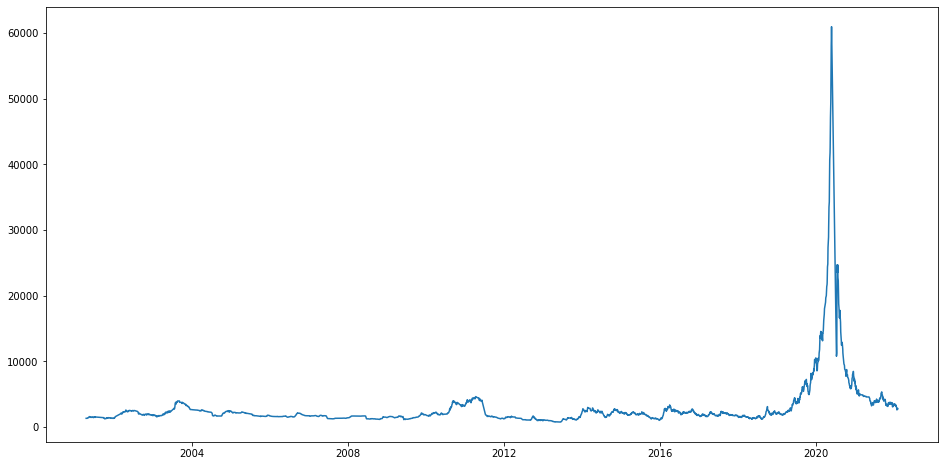

In [44]:
df["Date"]=pd.to_datetime(df["<DTYYYYMMDD>"],format="%Y%m%d")
df.index=df['Date']
plt.figure(figsize=(16,8))
plt.plot(df["<CLOSE>"],label='Close Price history')

In [45]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close','Open','High','Vol','Low'])
for i in range(0,len(data)):
    new_dataset["Date"][i]=data['Date'][i]
    new_dataset["Close"][i]=data["<CLOSE>"][i]
    new_dataset["Open"][i]=data["<OPEN>"][i]
    new_dataset["High"][i]=data["<HIGH>"][i]
    new_dataset["Vol"][i]=data["<VOL>"][i]
    new_dataset["Low"][i]=data["<LOW>"][i]



In [46]:
tmp_dataset=new_dataset.copy()
tmp_dataset
tmp_dataset['Date'] = pd.to_datetime(tmp_dataset['Date']).dt.date
#tmp_dataset
tmp_dataset.set_index('Date', inplace = True)
tmp_dataset

,Close,Open,High,Vol,Low
Date,,,,,
2001-04-17,1350.0,1350.0,1350.0,1000,1350.0
2001-04-18,1350.0,1350.0,1350.0,7227,1350.0
2001-04-21,1350.0,1350.0,1350.0,9000,1350.0
2001-04-22,1351.0,1350.0,1351.0,236,1350.0
2001-04-23,1352.0,1351.0,1352.0,992,1352.0
...,...,...,...,...,...
2022-01-29,2786.0,2667.0,2800.0,5902630,2720.0
2022-01-30,2771.0,2786.0,2894.0,10425499,2700.0
2022-01-31,2865.0,2771.0,2909.0,15528547,2654.0


In [47]:
#CHANGE
#idx = pd.date_range('2001-05-06', '2022-01-30')
idx = pd.date_range('2019-03-21', '2022-01-30')
tmp_dataset = tmp_dataset.reindex(idx, fill_value=0)
for i in range(len(tmp_dataset)):
  if tmp_dataset['Close'][i] == 0:
    tmp_dataset['Close'][i] = tmp_dataset['Close'][i-1]
  if tmp_dataset['Open'][i] == 0:
    tmp_dataset['Open'][i] = tmp_dataset['Open'][i-1]
  if tmp_dataset['High'][i] == 0:
    tmp_dataset['High'][i] = tmp_dataset['High'][i-1]
  if tmp_dataset['Vol'][i] == 0:
    tmp_dataset['Vol'][i] = tmp_dataset['Vol'][i-1]
  if tmp_dataset['Low'][i] == 0:
    tmp_dataset['Low'][i] = tmp_dataset['Low'][i-1]
  
tmp_dataset

,Close,Open,High,Vol,Low
2019-03-21,2771.0,2786.0,2894.0,10425499,2700.0
2019-03-22,2771.0,2786.0,2894.0,10425499,2700.0
2019-03-23,2771.0,2786.0,2894.0,10425499,2700.0
2019-03-24,2771.0,2786.0,2894.0,10425499,2700.0
2019-03-25,2251.0,2201.0,2311.0,2205674,2179.0
...,...,...,...,...,...
2022-01-26,2667.0,2631.0,2749.0,10069991,2585.0
2022-01-27,2667.0,2631.0,2749.0,10069991,2585.0
2022-01-28,2667.0,2631.0,2749.0,10069991,2585.0
2022-01-29,2786.0,2667.0,2800.0,5902630,2720.0


In [48]:
tmp_dataset.index.name = 'Date'
tmp_dataset.tail(10)
# aggregated_hashtag_df = aggregated_hashtag_df.drop(['Date'], axis=1)
# aggregated_hashtag_df.head()

,Close,Open,High,Vol,Low
Date,,,,,
2022-01-21,3107.0,3148.0,3183.0,5687086,3035.0
2022-01-22,2994.0,3107.0,3189.0,13677541,2952.0
2022-01-23,2853.0,2994.0,2946.0,15269504,2845.0
2022-01-24,2758.0,2853.0,2890.0,13963916,2711.0
2022-01-25,2631.0,2758.0,2720.0,12514180,2621.0
2022-01-26,2667.0,2631.0,2749.0,10069991,2585.0
2022-01-27,2667.0,2631.0,2749.0,10069991,2585.0
2022-01-28,2667.0,2631.0,2749.0,10069991,2585.0
2022-01-29,2786.0,2667.0,2800.0,5902630,2720.0


In [49]:
aggregated_hashtag_df.index.astype = 'datetime64[ns]'
tmp_dataset.index.astype = 'datetime64[ns]'


In [50]:
tmp_dataset.tail(10)


,Close,Open,High,Vol,Low
Date,,,,,
2022-01-21,3107.0,3148.0,3183.0,5687086,3035.0
2022-01-22,2994.0,3107.0,3189.0,13677541,2952.0
2022-01-23,2853.0,2994.0,2946.0,15269504,2845.0
2022-01-24,2758.0,2853.0,2890.0,13963916,2711.0
2022-01-25,2631.0,2758.0,2720.0,12514180,2621.0
2022-01-26,2667.0,2631.0,2749.0,10069991,2585.0
2022-01-27,2667.0,2631.0,2749.0,10069991,2585.0
2022-01-28,2667.0,2631.0,2749.0,10069991,2585.0
2022-01-29,2786.0,2667.0,2800.0,5902630,2720.0


In [51]:
aggregated_hashtag_df.tail()

,Date,view_count
Date,,
2019-03-27,2019-03-27,12202
2019-03-26,2019-03-26,245430
2019-03-25,2019-03-25,70530
2019-03-24,2019-03-24,22879
2019-03-22,2019-03-22,19103


In [52]:
inner_merged_total = pd.merge(tmp_dataset, aggregated_hashtag_df, left_index=True, right_index=True)
inner_merged_total
####del inner_merged_total['Date']
inner_merged_total


,Close,Open,High,Vol,Low,Date,view_count
Date,,,,,,,
2019-03-22,2771.0,2786.0,2894.0,10425499,2700.0,2019-03-22,19103
2019-03-24,2771.0,2786.0,2894.0,10425499,2700.0,2019-03-24,22879
2019-03-25,2251.0,2201.0,2311.0,2205674,2179.0,2019-03-25,70530
2019-03-26,2343.0,2251.0,2363.0,3225812,2300.0,2019-03-26,245430
2019-03-27,2257.0,2343.0,2380.0,3128150,2226.0,2019-03-27,12202
...,...,...,...,...,...,...,...
2022-01-26,2667.0,2631.0,2749.0,10069991,2585.0,2022-01-26,9486
2022-01-27,2667.0,2631.0,2749.0,10069991,2585.0,2022-01-27,751
2022-01-28,2667.0,2631.0,2749.0,10069991,2585.0,2022-01-28,103


In [53]:
merged_df = inner_merged_total

In [54]:
import numpy as np
import pandas as pd

merged_df['Date'] = merged_df.index
merged_df.reset_index(drop=True, inplace=True)
merged_df['period'] = merged_df.index
merged_df.set_index('period', inplace = True)
merged_df

,Close,Open,High,Vol,Low,Date,view_count
period,,,,,,,
0,2771.0,2786.0,2894.0,10425499,2700.0,2019-03-22,19103
1,2771.0,2786.0,2894.0,10425499,2700.0,2019-03-24,22879
2,2251.0,2201.0,2311.0,2205674,2179.0,2019-03-25,70530
3,2343.0,2251.0,2363.0,3225812,2300.0,2019-03-26,245430
4,2257.0,2343.0,2380.0,3128150,2226.0,2019-03-27,12202
...,...,...,...,...,...,...,...
1027,2667.0,2631.0,2749.0,10069991,2585.0,2022-01-26,9486
1028,2667.0,2631.0,2749.0,10069991,2585.0,2022-01-27,751
1029,2667.0,2631.0,2749.0,10069991,2585.0,2022-01-28,103


In [55]:
tmp_dataset

tmp_dataset['Date'] = tmp_dataset.index
tmp_dataset.reset_index(drop=True, inplace=True)
tmp_dataset['period'] = tmp_dataset.index
tmp_dataset.set_index('period', inplace = True)
tmp_dataset

,Close,Open,High,Vol,Low,Date
period,,,,,,
0,2771.0,2786.0,2894.0,10425499,2700.0,2019-03-21
1,2771.0,2786.0,2894.0,10425499,2700.0,2019-03-22
2,2771.0,2786.0,2894.0,10425499,2700.0,2019-03-23
3,2771.0,2786.0,2894.0,10425499,2700.0,2019-03-24
4,2251.0,2201.0,2311.0,2205674,2179.0,2019-03-25
...,...,...,...,...,...,...
1042,2667.0,2631.0,2749.0,10069991,2585.0,2022-01-26
1043,2667.0,2631.0,2749.0,10069991,2585.0,2022-01-27
1044,2667.0,2631.0,2749.0,10069991,2585.0,2022-01-28


In [56]:
copy_data = merged_df.copy()

In [57]:
#CHANGE
new_dataset = pd.DataFrame(index=range(0,len(copy_data)),columns=['Date','Close','view_count'])



In [58]:
new_dataset2 = pd.DataFrame(index=range(0,len(copy_data)),columns=['Close','Date'])

In [59]:
#CHANGE
for i in range(len(copy_data)):
  new_dataset['Date'][i] = copy_data['Date'][i]
  new_dataset['Close'][i] = copy_data['Close'][i] 
  new_dataset['view_count'][i] = copy_data['view_count'][i] 


In [60]:
new_dataset

,Date,Close,view_count
0,2019-03-22 00:00:00,2771.0,19103
1,2019-03-24 00:00:00,2771.0,22879
2,2019-03-25 00:00:00,2251.0,70530
3,2019-03-26 00:00:00,2343.0,245430
4,2019-03-27 00:00:00,2257.0,12202
...,...,...,...
1027,2022-01-26 00:00:00,2667.0,9486
1028,2022-01-27 00:00:00,2667.0,751
1029,2022-01-28 00:00:00,2667.0,103
1030,2022-01-29 00:00:00,2786.0,13326


In [61]:
for i in range(len(copy_data)):
  new_dataset2['Date'][i] = copy_data['Date'][i]
  new_dataset2['Close'][i] = copy_data['Close'][i] 
new_dataset2.index=new_dataset2.Date
new_dataset2.drop("Date",axis=1,inplace=True)

In [62]:
TRAIN_NUM = 987
WDTH = 60
UNIT = 50
FEATURE_NUM = 2
#CHANGE

In [63]:
scaler=MinMaxScaler(feature_range=(0,1))
final_dataset=new_dataset.values
#print(final_dataset)
train_data=final_dataset[0:TRAIN_NUM,:]
valid_data=final_dataset[TRAIN_NUM:,:]
new_dataset.index=new_dataset.Date
#print(new_dataset)
new_dataset.drop("Date",axis=1,inplace=True)
#print(new_dataset)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(new_dataset)
x_train_data,y_train_data=[],[]
for i in range(WDTH,len(train_data)):
    x_train_data.append(scaled_data[i-WDTH:i,:])
    #x_train_data.append(scaled_data[i-WDTH:i,0])
    y_train_data.append(scaled_data[i,0])


x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)
#x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))
x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],FEATURE_NUM))

In [64]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=UNIT,return_sequences=True,input_shape=(x_train_data.shape[1],FEATURE_NUM)))
lstm_model.add(LSTM(units=UNIT))
lstm_model.add(Dense(1))
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-WDTH:].values
print(inputs_data.shape)
#inputs_data=inputs_data.reshape(-1,1)
inputs_data=inputs_data.reshape(len(inputs_data),FEATURE_NUM)
print(inputs_data.shape)
print(x_train_data.shape)
inputs_data=scaler.transform(inputs_data)
lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)
train_acc = lstm_model.evaluate(x_train_data, y_train_data, verbose=0)

print("Train acc:",train_acc)

(105, 2)
(105, 2)
(927, 60, 2)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


927/927 - 8s - loss: 0.0069 - 8s/epoch - 9ms/step
Train acc: 0.003969362936913967


In [65]:
X_test=[]
for i in range(WDTH,inputs_data.shape[0]):
    X_test.append(inputs_data[i-WDTH:i,:])
    #X_test.append(inputs_data[i-WDTH:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],FEATURE_NUM))
predicted_closing_price=lstm_model.predict(X_test)
#predicted_closing_price=scaler2.inverse_transform(predicted_closing_price)

In [66]:
scaler2=MinMaxScaler(feature_range=(0,1))
copy_d = new_dataset2
scaled_data2=scaler2.fit_transform(copy_d)
inputs_data2=copy_d[len(new_dataset)-len(valid_data)-WDTH:].values
inputs_data2=inputs_data2.reshape(-1,1)
inputs_data2=scaler2.transform(inputs_data2)
predicted_closing_price = scaler2.inverse_transform(predicted_closing_price)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [67]:
lstm_model.save("saved_model.h5")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


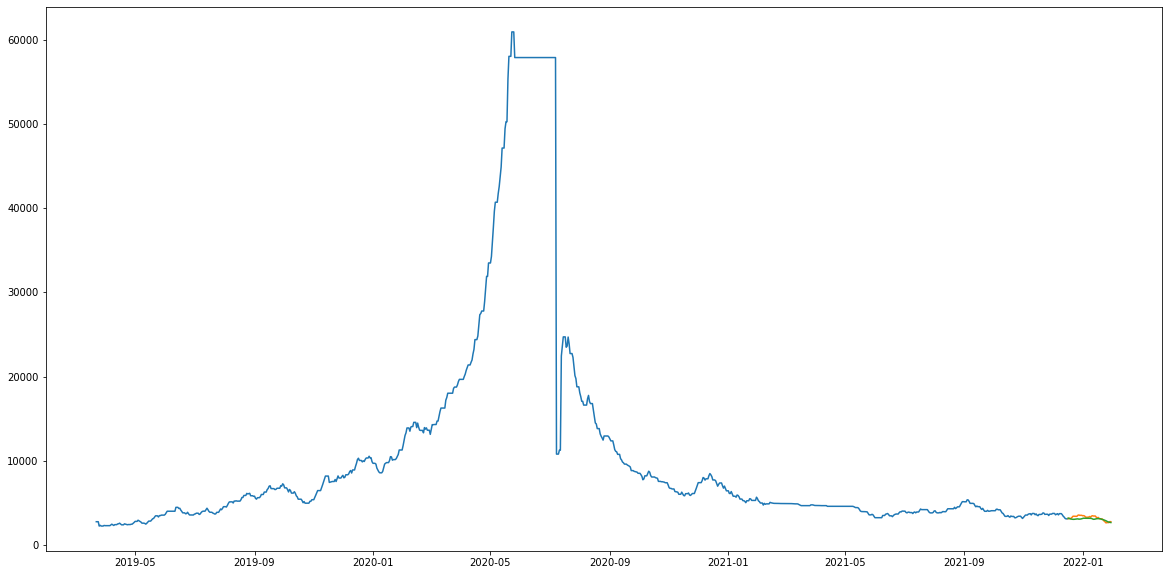

In [68]:
train_data=new_dataset[:TRAIN_NUM]
valid_data=new_dataset[TRAIN_NUM:]
valid_data['Predictions']=predicted_closing_price
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])

In [69]:
len_df = len(valid_data['Predictions'])
valid_data['Growth'] = np.nan
valid_data['Growth Percent'] = np.nan

for i in range (len_df-1):
  GrowthPercent =((valid_data['Predictions'][i+1] - valid_data['Close'][i])/ valid_data['Close'][i])*100
  valid_data['Growth Percent'][i+1] = GrowthPercent
  status = "-"
  if (GrowthPercent > 0.5):
    status = +1
  elif(GrowthPercent < -0.5):
    status = -1
  else:
    status = 0
  valid_data['Growth'][i+1] = status
valid_data.head(100)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.py

,Close,view_count,Predictions,Growth,Growth Percent
Date,,,,,
2021-12-17,3110.0,3738,3199.622559,NaN,NaN
2021-12-18,3204.0,5404,3152.851807,1.0,1.377872
2021-12-19,3135.0,4182,3119.630615,-1.0,-2.633252
2021-12-20,3182.0,8896,3092.101318,-1.0,-1.368379
2021-12-21,3285.0,8706,3068.467773,-1.0,-3.567952
2021-12-22,3422.0,10406,3054.498047,-1.0,-7.016802
2021-12-23,3422.0,2219,3053.916016,-1.0,-10.756399
2021-12-24,3422.0,4020,3066.387207,-1.0,-10.391958
2021-12-25,3413.0,8061,3083.756104,-1.0,-9.884392


In [70]:
from sklearn.metrics import mean_squared_error
test_y = valid_data['Close'].values
pred_y = valid_data['Predictions'].values

test_y= test_y.tolist()
pred_y= pred_y.tolist()
#print(pred_y)
errors = mean_squared_error(test_y, pred_y)/10000
# report error
print("errors " ,errors)

errors  6.464987888121472
